In [655]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import os
import seaborn as sns

sns.set_style("white")

In [16]:
print(os.getcwd())
os.chdir("c:/Users/astro/Documents/Python_Project/ForecastCloudinJapan")
print(os.getcwd())

c:\Users\astro\Documents\Python_Project\ForecastCloudinJapan
c:\Users\astro\Documents\Python_Project\ForecastCloudinJapan


In [674]:
path = "obsData/44_47662/2022/"

all_df = pd.read_csv(path+"1/"+"44_47662_2022_1_1.csv")

dt = datetime.datetime(2022,1,2)

while True:
    tmpdf = pd.read_csv(f"{path}{dt.month}/44_47662_{dt.year}_{dt.month}_{dt.day}.csv")
    all_df = pd.concat([all_df,tmpdf])
    dt += datetime.timedelta(days=1)
    del tmpdf
    if dt.year == 2023:
        break

In [651]:
jan = all_df[pd.to_datetime(all_df["日付"]) < datetime.datetime(2022,2,1)]

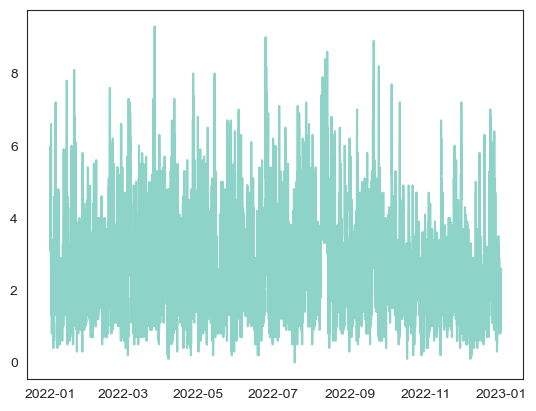

In [675]:
fig,ax = plt.subplots()

ax.plot(pd.to_datetime(all_df["日付"]),all_df["風速"])

# ax.xaxis.set_major_locator(mdates.AutoDateLocator())
# ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(mdates.MONTHLY))
# fig.autofmt_xdate()

plt.show()

In [664]:
jan["日付"]

0     2022-01-01 01:00:00
1     2022-01-01 02:00:00
2     2022-01-01 03:00:00
3     2022-01-01 04:00:00
4     2022-01-01 05:00:00
             ...         
18    2022-01-31 19:00:00
19    2022-01-31 20:00:00
20    2022-01-31 21:00:00
21    2022-01-31 22:00:00
22    2022-01-31 23:00:00
Name: 日付, Length: 743, dtype: object